# Exploratory Data Analysis – Pet Insurance Analytics

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt


# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load data
data_path = r"C:\Users\leebe\Documents\VScode\portfolio project\Pet Insurance Analytics Project\data\processed"

claims = pd.read_csv(os.path.join(data_path, 'fact_claims_summary.csv'))
customers = pd.read_csv(os.path.join(data_path, 'dim_customers.csv'))
products = pd.read_csv(os.path.join(data_path, 'dim_products.csv'))
vet_costs = pd.read_csv(os.path.join(data_path, 'fact_vet_costs.csv'))


## Data checks

In [113]:
# Define basic_checks function (to re-use across datasets)
def basic_checks(df, name):
    print(f"\n{'='*60}")
    print(f"📊 Dataset: {name}")
    print(f"{'='*60}")
    print(f"Shape: {df.shape}")
    print("\nColumn types:")
    print(df.dtypes)
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nDuplicate rows:", df.duplicated().sum())
    print("\nSummary statistics:")
    display(df.describe(include='all').transpose())
    print("\nTop 5 rows:")
    display(df.head())
    print("\nUnique values per column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

# Run checks on all datasets
basic_checks(claims, "Claims")
basic_checks(customers, "Customers")
basic_checks(products, "Products")
basic_checks(vet_costs, "Vet Costs")


📊 Dataset: Claims
Shape: (200000, 17)

Column types:
claim_id              int64
claim_date              str
claim_amount        float64
status                  str
diagnosis               str
policy_id             int64
product_name            str
coverage_type           str
monthly_premium     float64
pet_id                int64
species                 str
breed                   str
age_at_claim          int64
customer_id           int64
customer_name           str
customer_city           str
customer_country        str
dtype: object

Missing values:
claim_id            0
claim_date          0
claim_amount        0
status              0
diagnosis           0
policy_id           0
product_name        0
coverage_type       0
monthly_premium     0
pet_id              0
species             0
breed               0
age_at_claim        0
customer_id         0
customer_name       0
customer_city       0
customer_country    0
dtype: int64

Duplicate rows: 0

Summary statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
claim_id,200000.0,NaN,NaN,NaN,100000.5,57735.171256,1.0,50000.75,100000.5,150000.25,200000.0
claim_date,200000,1825,2026-02-02,745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
claim_amount,200000.0,NaN,NaN,NaN,639.544595,624.9186,60.01,230.88,422.71,790.35,4999.31
status,200000,4,Pending,50243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagnosis,200000,39,Injury,17372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_id,200000.0,NaN,NaN,NaN,60066.016045,34694.438475,1.0,29870.0,60091.5,90052.0,119999.0
product_name,200000,27,Senior Pet Add-on,7708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage_type,200000,6,Lifetime,44355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_premium,200000.0,NaN,NaN,NaN,48.890583,23.720132,13.19,28.33,55.34,66.43,89.68
pet_id,200000.0,NaN,NaN,NaN,37608.69465,21755.194599,4.0,18669.0,37640.5,56532.5,75150.0



Top 5 rows:


,claim_id,claim_date,claim_amount,status,diagnosis,policy_id,product_name,coverage_type,monthly_premium,pet_id,species,breed,age_at_claim,customer_id,customer_name,customer_city,customer_country
0,15463,2023-11-20,150.67,Open,Ear Infection,1,Lifetime Premier,Lifetime,57.44,30289,Dog,Boxer,2,24094,Gerald Cook,Richardside,Russian Federation
1,82583,2022-12-10,96.08,Open,Ear Infection,1,Lifetime Premier,Lifetime,57.44,30289,Dog,Boxer,1,24094,Gerald Cook,Richardside,Russian Federation
2,169782,2022-07-07,461.61,Rejected,Pancreatitis,1,Lifetime Premier,Lifetime,57.44,30289,Dog,Boxer,1,24094,Gerald Cook,Richardside,Russian Federation
3,83918,2023-10-28,350.64,Open,Dental Issue,2,Lifetime Supreme,Lifetime,30.19,45173,Dog,Border Collie,15,35877,Jennifer Medina,East Sean,Mayotte
4,50069,2025-10-31,1474.60,Closed,Foreign Body Ingestion,3,Max Benefit 10k,Maximum Benefit,32.13,18891,Dog,Australian Shepherd,1,15056,Kyle Lewis,Roytown,Cayman Islands



Unique values per column:
claim_id: 200000
claim_date: 1825
claim_amount: 101439
status: 4
diagnosis: 39
policy_id: 97500
product_name: 27
coverage_type: 6
monthly_premium: 27
pet_id: 54670
species: 3
breed: 97
age_at_claim: 22
customer_id: 40968
customer_name: 33340
customer_city: 21975
customer_country: 243

📊 Dataset: Customers
Shape: (60000, 9)

Column types:
customer_id              int64
full_name                  str
city                       str
country                    str
pets_owned               int64
policies_owned           int64
total_claims             int64
total_claim_amount     float64
total_premiums_paid    float64
dtype: object

Missing values:
customer_id                0
full_name                  0
city                       0
country                    0
pets_owned                 0
policies_owned             0
total_claims               0
total_claim_amount     19032
total_premiums_paid    16271
dtype: int64

Duplicate rows: 0

Summary statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,60000.0,NaN,NaN,NaN,30000.5,17320.652413,1.0,15000.75,30000.5,45000.25,60000.0
full_name,60000,45939,Michael Smith,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,60000,28097,East Michael,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,60000,243,Korea,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pets_owned,60000.0,NaN,NaN,NaN,1.2525,0.857276,0.0,1.0,1.0,2.0,4.0
policies_owned,60000.0,NaN,NaN,NaN,2.0,1.968705,0.0,0.0,2.0,3.0,15.0
total_claims,60000.0,NaN,NaN,NaN,3.333333,3.741914,0.0,0.0,2.0,5.0,28.0
total_claim_amount,40968.0,NaN,NaN,NaN,3122.166544,2703.292104,61.16,1098.58,2414.54,4362.0825,29875.02
total_premiums_paid,43729.0,NaN,NaN,NaN,4727.557442,4291.422909,0.0,1590.6,3448.02,6576.2,37363.48



Top 5 rows:


,customer_id,full_name,city,country,pets_owned,policies_owned,total_claims,total_claim_amount,total_premiums_paid
0,1,Johnny Gonzalez,West James,Greece,1,0,0,NaN,NaN
1,2,Daniel Adkins,North Kristen,Faroe Islands,1,1,0,NaN,1185.45
2,3,Meredith Gardner,South Tiffany,Saudi Arabia,1,0,0,NaN,NaN
3,4,Sarah Logan,Port Taylormouth,Monaco,1,1,1,248.41,397.80
4,5,Zachary Miles,Smithport,Niue,1,2,5,2251.36,8756.85



Unique values per column:
customer_id: 60000
full_name: 45939
city: 28097
country: 243
pets_owned: 5
policies_owned: 16
total_claims: 29
total_claim_amount: 39719
total_premiums_paid: 32575

📊 Dataset: Products
Shape: (27, 11)

Column types:
product_id                   int64
product_name                   str
coverage_type                  str
monthly_premium            float64
annual_limit                 int64
deductible                   int64
total_policies               int64
total_claims                 int64
total_claim_amount         float64
total_premium_collected    float64
loss_ratio                 float64
dtype: object

Missing values:
product_id                 0
product_name               0
coverage_type              0
monthly_premium            0
annual_limit               0
deductible                 0
total_policies             0
total_claims               0
total_claim_amount         0
total_premium_collected    0
loss_ratio                 0
dtype: int64

Duplicat

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,27.0,NaN,NaN,NaN,14.0,7.937254,1.0,7.5,14.0,20.5,27.0
product_name,27,27,Lifetime Essential,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage_type,27,6,Lifetime,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_premium,27.0,NaN,NaN,NaN,48.822593,24.239262,13.19,29.26,55.34,64.98,89.68
annual_limit,27.0,NaN,NaN,NaN,4814.814815,3903.026804,1000.0,2000.0,4000.0,8000.0,12000.0
deductible,27.0,NaN,NaN,NaN,120.37037,63.183584,50.0,75.0,100.0,150.0,250.0
total_policies,27.0,NaN,NaN,NaN,4444.444444,61.378606,4340.0,4398.0,4446.0,4492.5,4573.0
total_claims,27.0,NaN,NaN,NaN,7407.407407,128.18564,7187.0,7332.0,7403.0,7462.0,7708.0
total_claim_amount,27.0,NaN,NaN,NaN,4737367.368889,106665.267656,4524296.95,4659769.955,4728650.0,4811197.9,4958365.6
total_premium_collected,27.0,NaN,NaN,NaN,7656717.014815,3793161.196654,2060620.94,4592954.19,8646432.28,10341762.135,13852969.62



Top 5 rows:


,product_id,product_name,coverage_type,monthly_premium,annual_limit,deductible,total_policies,total_claims,total_claim_amount,total_premium_collected,loss_ratio
0,1,Lifetime Essential,Lifetime,28.33,2000,100,4431,7321,4635098.41,4412567.48,1.05
1,2,Lifetime Plus,Lifetime,87.99,4000,75,4446,7409,4721727.36,13852969.62,0.34
2,3,Lifetime Premier,Lifetime,57.44,1000,75,4446,7400,4751997.10,8999526.88,0.53
3,4,Lifetime Elite,Lifetime,89.68,2000,50,4372,7259,4609300.73,13690459.12,0.34
4,5,Lifetime Ultra,Lifetime,66.43,12000,75,4422,7405,4680589.25,10480860.39,0.45



Unique values per column:
product_id: 27
product_name: 27
coverage_type: 6
monthly_premium: 27
annual_limit: 5
deductible: 5
total_policies: 26
total_claims: 27
total_claim_amount: 27
total_premium_collected: 27
loss_ratio: 21

📊 Dataset: Vet Costs
Shape: (600000, 11)

Column types:
visit_id            int64
visit_date            str
vet_clinic            str
visit_type            str
treatment_code        str
description           str
cost              float64
claim_id            int64
policy_id           int64
pet_id              int64
customer_id         int64
dtype: object

Missing values:
visit_id          0
visit_date        0
vet_clinic        0
visit_type        0
treatment_code    0
description       0
cost              0
claim_id          0
policy_id         0
pet_id            0
customer_id       0
dtype: int64

Duplicate rows: 5

Summary statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visit_id,600000.0,NaN,NaN,NaN,124975.614417,72211.791969,1.0,62512.75,124986.0,187438.0,250000.0
visit_date,600000,1728,2026-02-02,8696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vet_clinic,600000,39,Cedar Grove Vets,15813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit_type,600000,5,Consultation,271169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment_code,600000,38,CONSULT,102469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,600000,38,Consultation Fee,102469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost,600000.0,NaN,NaN,NaN,267.288404,438.389018,20.0,71.68,110.04,268.34,2999.96
claim_id,600000.0,NaN,NaN,NaN,100100.536835,57706.679261,1.0,50282.0,100134.0,150000.0,199999.0
policy_id,600000.0,NaN,NaN,NaN,60050.576847,34638.007443,1.0,30106.0,60054.0,90028.5,119998.0
pet_id,600000.0,NaN,NaN,NaN,37518.887877,21783.960248,5.0,18504.75,37529.0,56379.0,75150.0



Top 5 rows:


,visit_id,visit_date,vet_clinic,visit_type,treatment_code,description,cost,claim_id,policy_id,pet_id,customer_id
0,1,2026-01-09,Beacon Hill Animal Hospital,Consultation,CYTO,Cytology,357.70,119086,32999,17053,13568
1,1,2026-01-09,Beacon Hill Animal Hospital,Consultation,XRAY,X-Ray Imaging,333.93,119086,32999,17053,13568
2,1,2026-01-09,Beacon Hill Animal Hospital,Consultation,SURG,Surgery (General),595.36,119086,32999,17053,13568
3,1,2026-01-09,Beacon Hill Animal Hospital,Consultation,FOLLOW,Follow-up Consultation,107.36,119086,32999,17053,13568
4,2,2026-01-14,Lakeside Animal Health,Consultation,CONSULT,Consultation Fee,45.47,128276,40298,6533,5231



Unique values per column:
visit_id: 227491
visit_date: 1728
vet_clinic: 39
visit_type: 5
treatment_code: 38
description: 38
cost: 98156
claim_id: 135644
policy_id: 81193
pet_id: 49744
customer_id: 38223


## Checking for missing values 

#### Heatmap that shows columns with missing values. Yellow = missing value

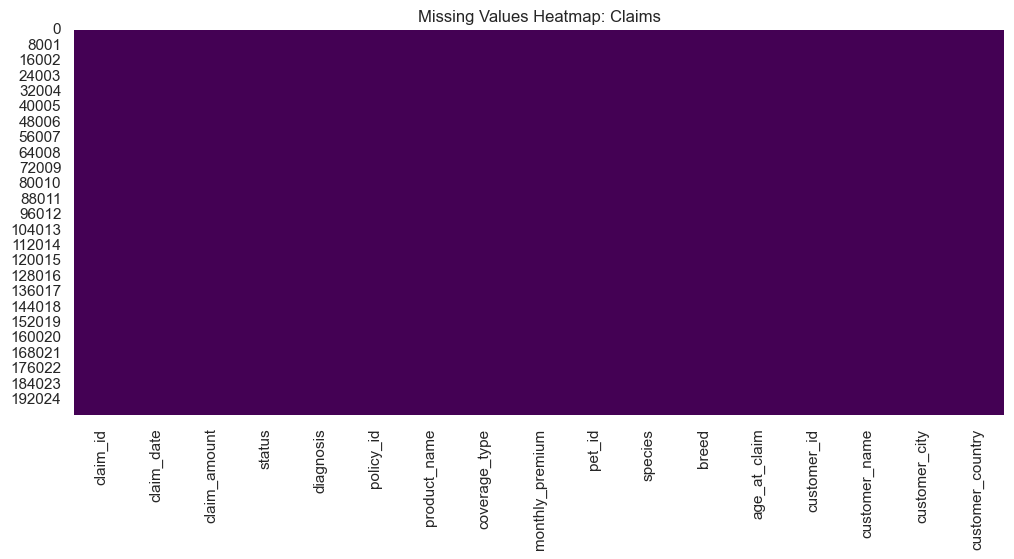

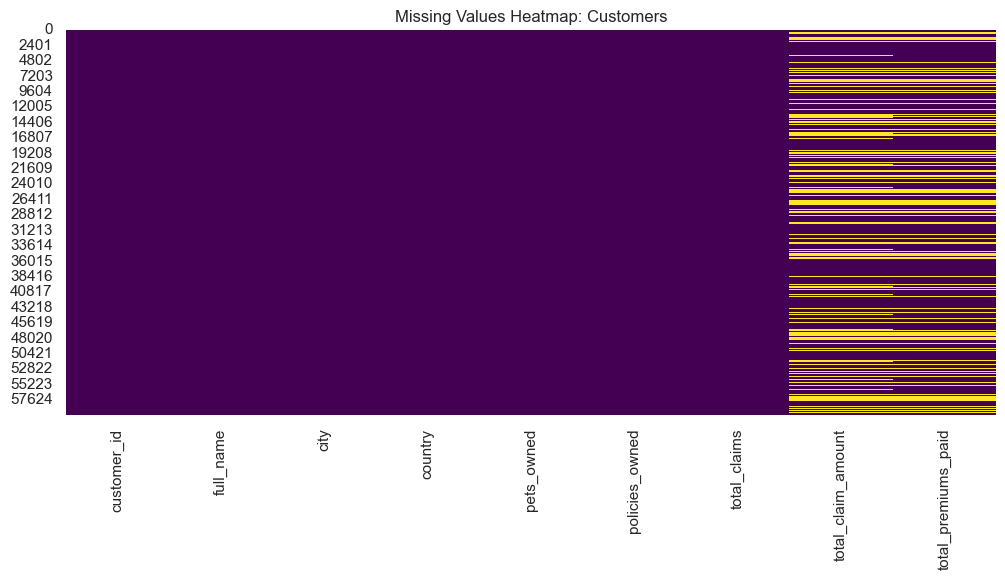

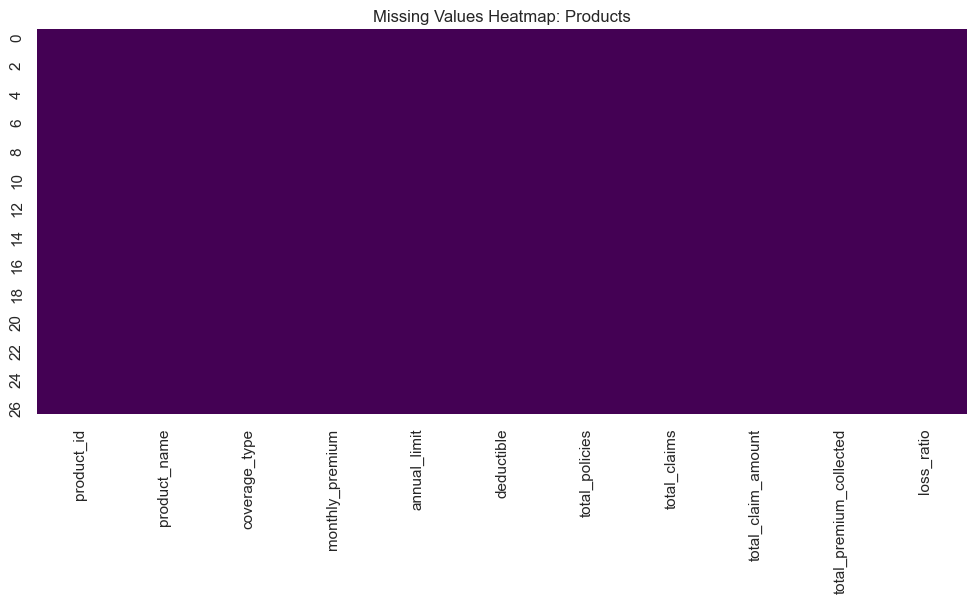

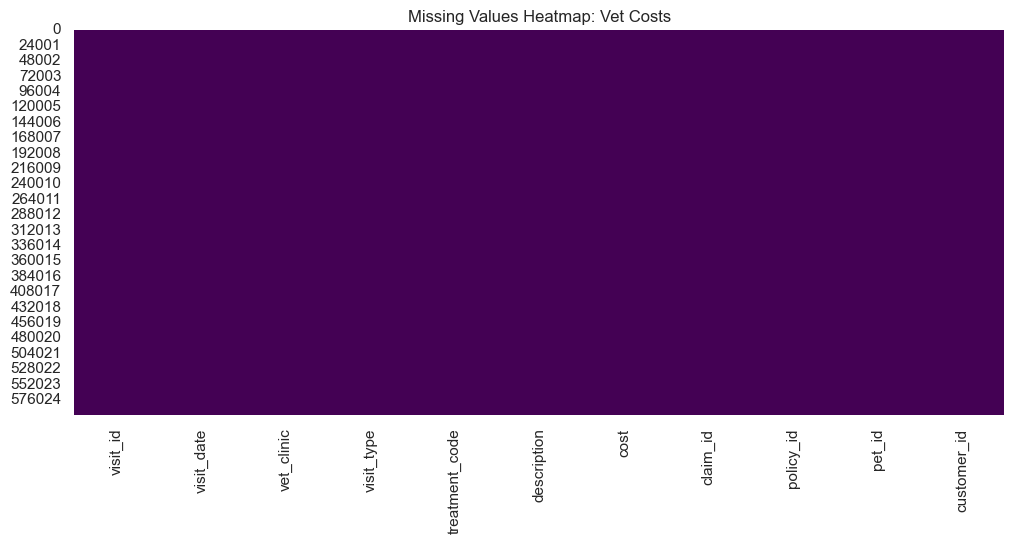

In [114]:
# Missing data for each ?
for df, name in zip([claims, customers, products, vet_costs], ['Claims', 'Customers', 'Products', 'Vet Costs']):
    plt.figure(figsize=(12, 5))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Missing Values Heatmap: {name}")
    plt.show()

In [115]:
# Check for duplicates
num_duplicates = claims.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(claims[claims.duplicated(keep=False)])


Number of duplicate rows: 0


In [116]:
# Check for duplicates
num_duplicates = customers.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(customers[customers.duplicated(keep=False)])


Number of duplicate rows: 0


In [117]:
# Check for duplicates
num_duplicates = vet_costs.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(vet_costs[vet_costs.duplicated(keep=False)])


Number of duplicate rows: 5

Duplicate rows:
        visit_id  visit_date                  vet_clinic    visit_type  \
91088      37802  2025-06-18  Parkside Veterinary Centre     Emergency   
91089      37802  2025-06-18  Parkside Veterinary Centre     Emergency   
207537     86408  2025-09-18           Happy Paws Clinic  Consultation   
207538     86408  2025-09-18           Happy Paws Clinic  Consultation   
215919     89915  2026-01-18            PetCare Hospital     Follow-up   
215920     89915  2026-01-18            PetCare Hospital     Follow-up   
407838    169902  2025-11-14     Northside Animal Clinic   Diagnostics   
407839    169902  2025-11-14     Northside Animal Clinic   Diagnostics   
452108    188322  2025-11-09              Riverbank Vets     Emergency   
452110    188322  2025-11-09              Riverbank Vets     Emergency   

       treatment_code       description    cost  claim_id  policy_id  pet_id  \
91088             MED        Medication  138.43    168753  

#### On review, it seems that 5 entries have been duplicated exactly. Below is the cell to drop them from the dataframe.

In [118]:
# Drop duplicate rows from the dataframe
before = len(vet_costs)

vet_costs = vet_costs.drop_duplicates().reset_index(drop=True)

after = len(vet_costs)
removed = before - after

print(f"Duplicates removed: {removed}")
print(f"New dataframe size: {after} rows")

Duplicates removed: 5
New dataframe size: 599995 rows


In [119]:
# Check for duplicates
num_duplicates = products.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("\nDuplicate rows:")
    print(products[products.duplicated(keep=False)])


Number of duplicate rows: 0


In [120]:
# Check for negative or zero values in key numeric columns
numeric_cols = ['claim_amount', 'monthly_premium']
for col in numeric_cols:
    print(f"\n{col} - Negative values: {(claims[col] < 0).sum()}, Zero values: {(claims[col] == 0).sum()}")


claim_amount - Negative values: 0, Zero values: 0

monthly_premium - Negative values: 0, Zero values: 0


In [121]:
# Check for implausible pet ages
print("\nPet age at claim - min/max:")
print(claims['age_at_claim'].describe())


Pet age at claim - min/max:
count    200000.000000
mean          7.692610
std           5.297611
min          -3.000000
25%           3.000000
50%           8.000000
75%          12.000000
max          18.000000
Name: age_at_claim, dtype: float64


In [122]:
# Sort products by median claim amount
order = claims.groupby('product_name')['claim_amount'].median().sort_values().index

# Sample a subset for the swarmplot to avoid overcrowding
sampled_claims = claims.sample(n=5000, random_state=42)

In [123]:
#Create function to create groups based on product name keywords

def classify_product(product):
    name = product.lower()

    # Time Limited
    if "travel" in name:
        return "Time Limited"

    # Accident
    if "accident" in name or "road" in name:
        return "Accident"

    # Max Benefit
    if "max benefit" in name or "max bmi" in name:
        return "MaxBen"

    # Lifetime
    if ("lifetime" in name or
        "supreme" in name or
        "physio" in name or
        "add-on" in name or
        "addon" in name):
        return "Lifetime"

    return "Other"

claims['product_type'] = claims['product_name'].apply(classify_product)
sampled_claims['product_type'] = sampled_claims['product_name'].apply(classify_product)

In [124]:
#Create function to save figures with timestamped filenames
def save_fig(name):
    filename = f"{name}_{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
    plt.savefig(
        fr"C:\Users\leebe\Documents\GitHub\Professional-Portfolio\Pet Insurance Analytics Project\images\{filename}",
        dpi=300,
        bbox_inches='tight'
    )

# Claim Amount by Species

C:\Users\leebe\AppData\Local\Temp\ipykernel_2520\592201787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


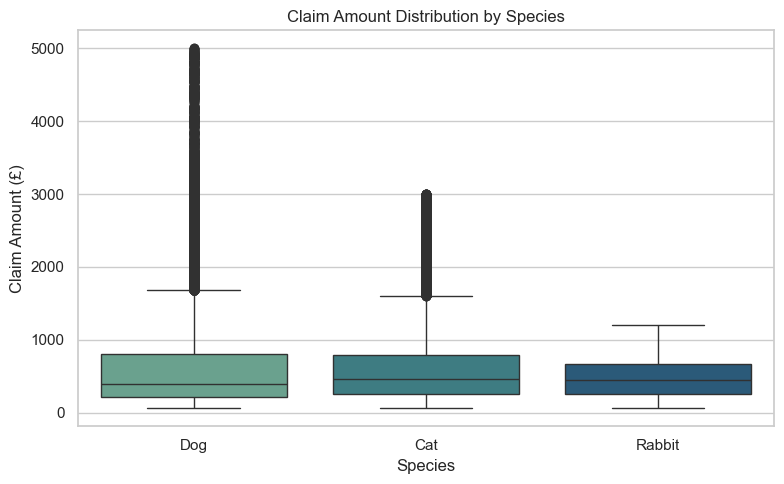

In [125]:
plt.figure(figsize=(8, 5))

palette = sns.color_palette('crest', n_colors=3)

sns.boxplot(
    data=claims,
    x='species',
    y='claim_amount',
    palette=palette
)

plt.title('Claim Amount Distribution by Species')
plt.ylabel('Claim Amount (£)')
plt.xlabel('Species')
plt.tight_layout()

filename = f"plot_{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}.png"

save_fig("eda_species_boxplot")
plt.show()

### Species Differences Are Noticeable but Not Extreme
- Dogs and cats have similar median claim amounts, but dogs show more high‑value outliers, likely due to size‑related treatments.
- Rabbits have lower and tighter claim distributions, reflecting lower treatment costs.
What this means:
Species influences cost, but the biggest drivers are product type and coverage level.

In [126]:
claims['product_name'].unique()

<StringArray>
[     'Lifetime Premier',      'Lifetime Supreme',       'Max Benefit 10k',
        'Lifetime Elite',  'Time-Limited Premium',        'Max Benefit 3k',
   'Travel Cover Add-on', 'Time-Limited Standard',        'Max Benefit 1k',
        'Lifetime Ultra',        'Max Benefit 5k',   'Accident-Only Elite',
    'Lifetime Essential',    'Time-Limited Basic',  'Physiotherapy Add-on',
     'Senior Pet Add-on',   'Accident-Only Basic',      'Rabbit Essential',
  'Small Mammal Premium',    'Dental Care Add-on',    'Small Mammal Basic',
        'Max Benefit 7k',         'Lifetime Plus',  'Puppy/Kitten Booster',
           'Rabbit Plus',    'Time-Limited Extra',    'Accident-Only Plus']
Length: 27, dtype: str

# Claim Distribution by Product

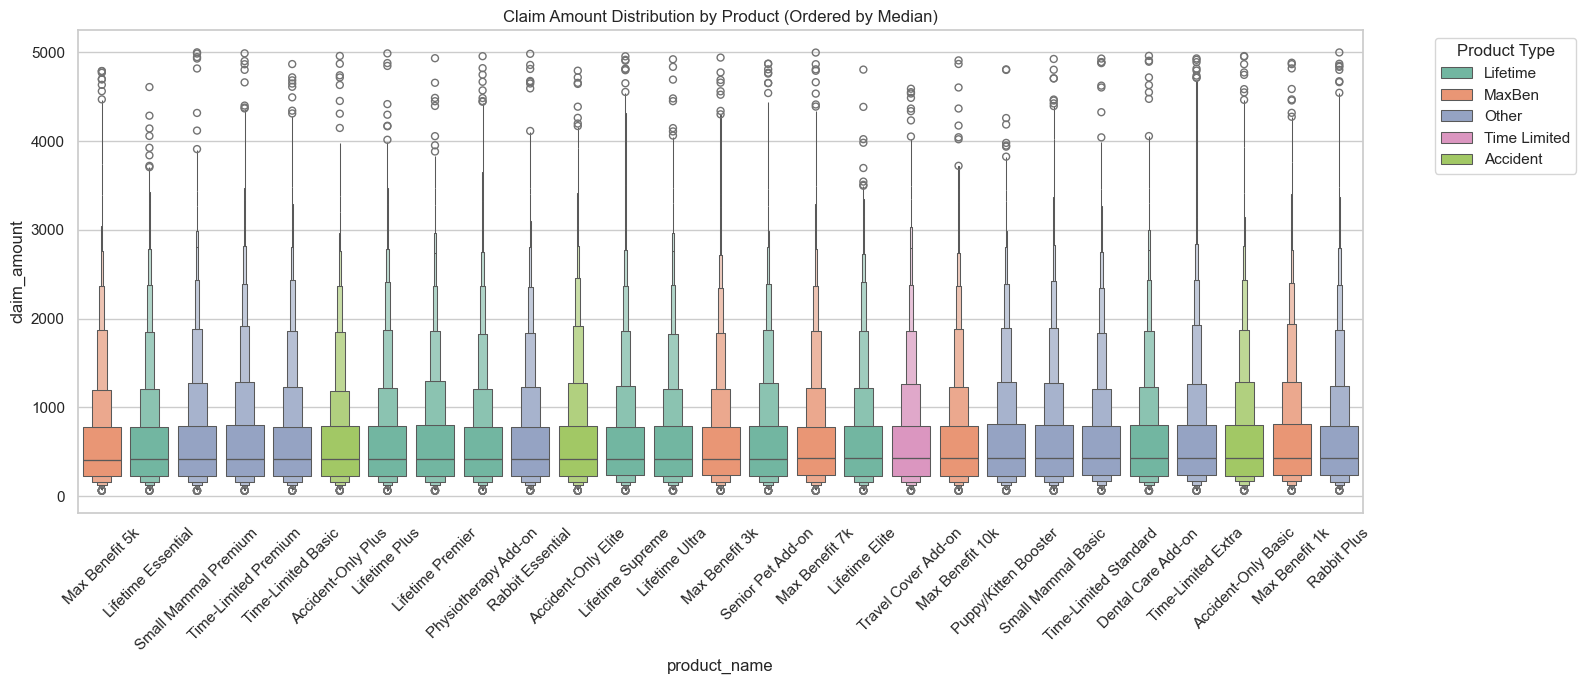

In [127]:
order = claims.groupby('product_name')['claim_amount'].median().sort_values().index

plt.figure(figsize=(16, 7))

sns.boxenplot(
    data=claims,
    x='product_name',
    y='claim_amount',
    order=order,
    hue='product_type',
    palette='Set2'
)

plt.xticks(rotation=45)
plt.title('Claim Amount Distribution by Product (Ordered by Median)')

# Move legend to the far right
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
save_fig("eda_claim_by_product_boxplot")
plt.show()

### Claim Amounts Vary Significantly by Product
- Lifetime and Max Benefit products tend to show higher variability in claim amounts, with long right‑tails and more high‑value outliers.
- Accident‑only and Time‑Limited products generally have lower median claim amounts, reflecting their narrower coverage scope.
- Add‑ons (Physio, Dental, Travel) show small but volatile claim distributions — low medians but occasional spikes.
What this means:
Different product structures drive different risk profiles. Lifetime and MaxBen products carry more exposure, while Accident and Time‑Limited products are more predictable.

# Claim Amount Distribution with Individual Claims

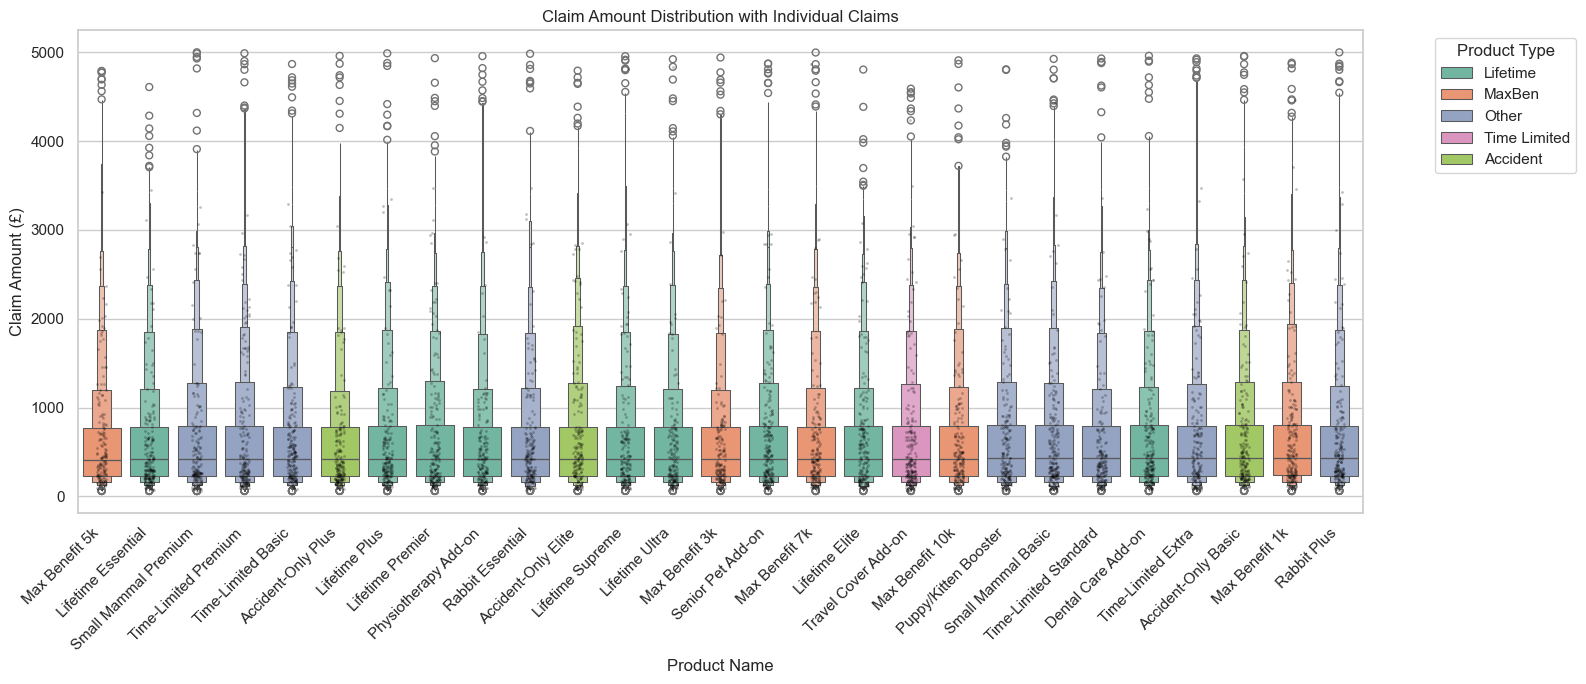

In [128]:
plt.figure(figsize=(16, 7))

sns.boxenplot(
    data=claims,
    x='product_name',
    y='claim_amount',
    hue='product_type',
    order=order,
    palette='Set2'
)

sns.stripplot(
    data=sampled_claims,
    x='product_name',
    y='claim_amount',
    order=order,
    color='black',
    alpha=0.25,
    size=2
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Claim Amount (£)')
plt.xlabel('Product Name')
plt.title('Claim Amount Distribution with Individual Claims')

# Move legend to the far right
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
save_fig("eda_claim_amount_boxplot_with_individual_claims")
plt.show()

#### Summary of what's shown

This chart shows the distribution of claim amounts for each insurance product.

- The **boxplots** represent the spread of claim amounts: median, quartiles, and outliers.
- The **dots** (stripplot) show individual claims, helping visualize frequency and variability.
- Products like 'Max Benefit 10k' and 'Lifetime Elite' show wider distributions, indicating higher and more variable claims.
- Products like 'Accident-Only Basic' and 'Time-Limited Basic' show tighter distributions, suggesting lower and more consistent claim amounts.
- Outliers (dots far above the boxes) highlight unusually expensive claims, often linked to surgery or chronic conditions.

This view helps compare how different products behave financially, and which ones tend to attract higher or more volatile claims.

# Claim Frequency by Species and Breed

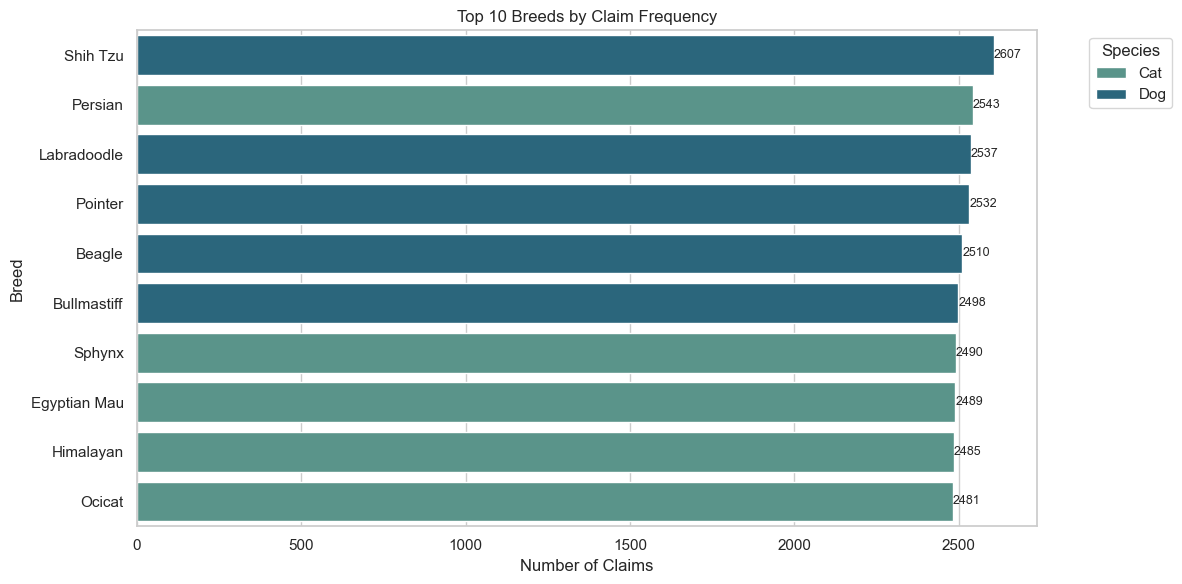

In [129]:
top_breeds = claims['breed'].value_counts().head(10).index
filtered = claims[claims['breed'].isin(top_breeds)]

plt.figure(figsize=(12, 6))

sns.countplot(
    data=filtered,
    y='breed',
    hue='species',
    order=top_breeds,
    palette='crest'   # matches your seaborn theme
)

# Add count labels
counts = filtered['breed'].value_counts()
for i, breed in enumerate(top_breeds):
    v = counts[breed]
    plt.text(v + 0.3, i, f"{v}", va='center', fontsize=9)

plt.title('Top 10 Breeds by Claim Frequency')
plt.xlabel('Number of Claims')
plt.ylabel('Breed')

# Move legend to the far right
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
save_fig("eda_top_breeds_by_claim_frequency")
plt.show()

### Breed Claim Frequency Highlights High‑Risk Groups
- Certain dog breeds (e.g., Shih Tzu, Labradoodle, Beagle) and cat breeds (e.g., Persian, Sphynx) appear frequently in claims.
- These breeds may have higher predisposition to medical issues or simply be more common in the customer base.
What this means:
Breed‑level insights can support pricing refinement, risk segmentation, and targeted wellness campaigns.

# Loss Ratio by Product

In [130]:
products_sorted = products.sort_values('loss_ratio', ascending=False)

C:\Users\leebe\AppData\Local\Temp\ipykernel_2520\3423520528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


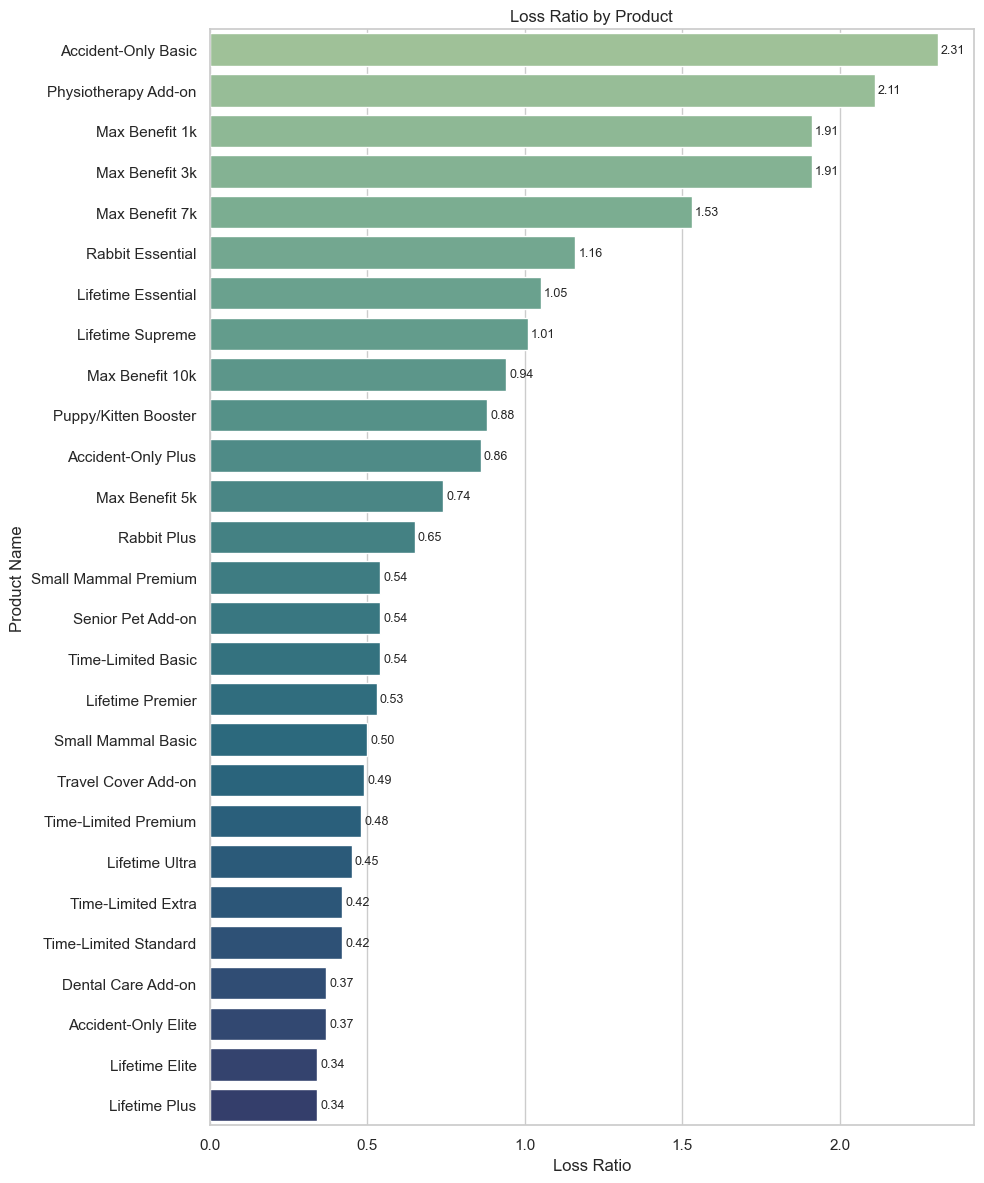

In [131]:
plt.figure(figsize=(10, 12))
sns.barplot(
    data=products_sorted,
    y='product_name',
    x='loss_ratio',
    palette='crest' 
)
for i, v in enumerate(products_sorted['loss_ratio']):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=9)
plt.title('Loss Ratio by Product')
plt.xlabel('Loss Ratio')
plt.ylabel('Product Name')
plt.tight_layout()
save_fig("eda_loss_ratio_by_product")
plt.show()

### Product Loss Ratios Reveal Clear Profitability Patterns
- Several Accident‑Only and Add‑On products show very high loss ratios, indicating potential underpricing or high claim frequency.
- Max Benefit products cluster around moderate loss ratios, suggesting balanced performance.
- Lifetime products generally sit in the 0.9–1.1 range, indicating stable long‑term pricing.
What this means:
Some products may require pricing review or underwriting adjustments, while others are performing as expected.

# Customer Lifetime Value Distribution

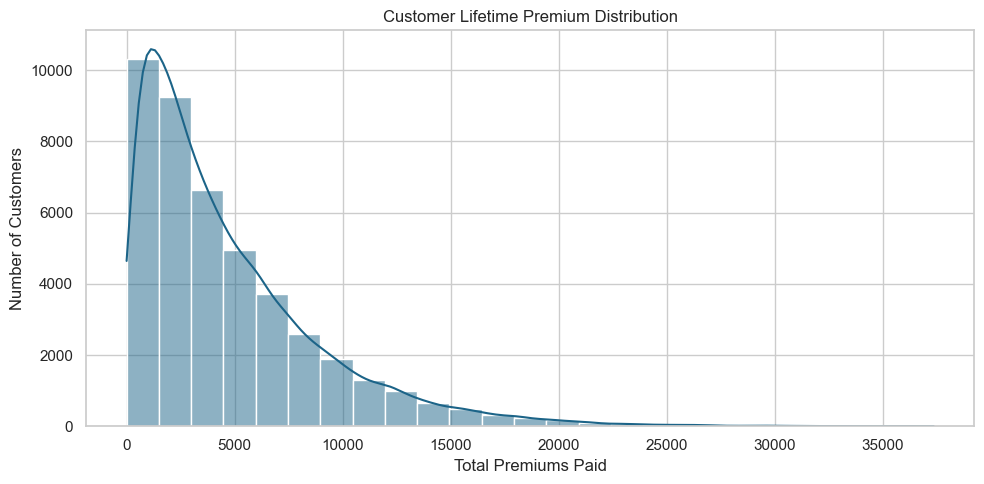

In [132]:
plt.figure(figsize=(10, 5))

color = sns.color_palette('crest')[4]

sns.histplot(
    customers['total_premiums_paid'],
    bins=25,
    kde=True,
    color=color,
    edgecolor='white'
)

plt.title('Customer Lifetime Premium Distribution')
plt.xlabel('Total Premiums Paid')
plt.ylabel('Number of Customers')
plt.tight_layout()
save_fig("eda_customer_lifetime_premium_distribution")
plt.show()

### Customer Lifetime Premiums Are Strongly Right‑Skewed
- Most customers pay relatively low total premiums over their lifetime.
- A small subset contributes very high lifetime value, creating a long tail.
What this means:
Retention of high‑value customers is crucial, and segmentation could help identify them early.

# Top 10 Most Expensive Vet Clinics by Average Treatment Cost

C:\Users\leebe\AppData\Local\Temp\ipykernel_2520\406536160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


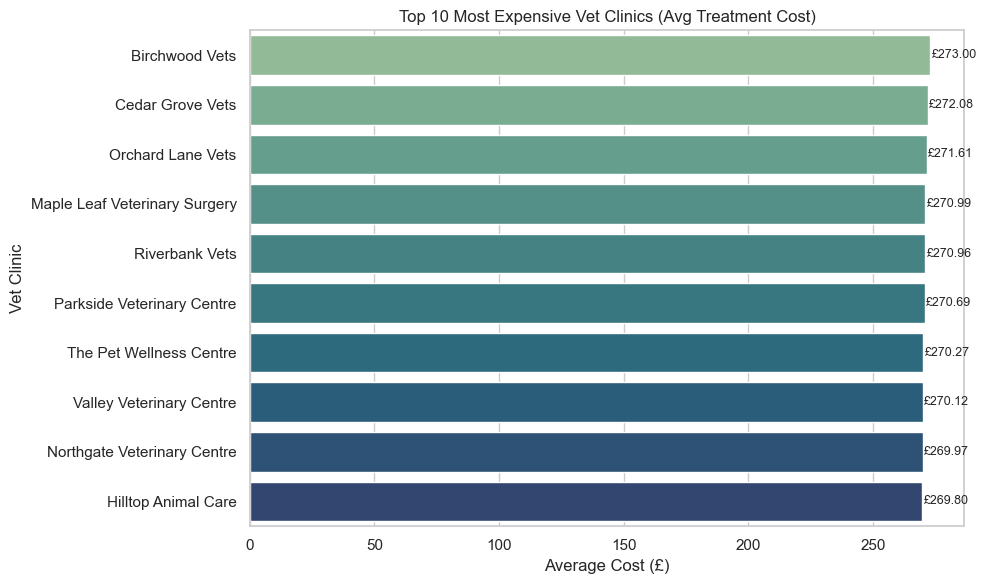

In [133]:
top_clinics = vet_costs.groupby('vet_clinic')['cost'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_clinics.values,
    y=top_clinics.index,
    palette='crest'   # matches your loss ratio colour style
)

for i, v in enumerate(top_clinics.values):
    plt.text(v + 0.5, i, f"£{v:.2f}", va='center', fontsize=9)

plt.title('Top 10 Most Expensive Vet Clinics (Avg Treatment Cost)')
plt.xlabel('Average Cost (£)')
plt.ylabel('Vet Clinic')
plt.tight_layout()
save_fig("eda_top_10_expensive_vet_clinics")
plt.show()

### Vet Clinic Costs Show Strong Regional/Provider Variation
- The top 10 most expensive clinics cluster tightly around £270 per treatment.
- This suggests consistent high‑cost providers, not random variation.
What this means:
Partnering with or monitoring high‑cost clinics could reduce claim severity.

# EDA Summary - Key points

Overall, the data tells a pretty clear story. The biggest driver of claim behaviour is the type of product a customer holds — Lifetime and Max Benefit policies bring the highest and most unpredictable costs, while Accident‑Only and Time‑Limited products stay much more stable. A few products stand out as potential pricing risks based on their loss ratios.

Species and breed add some extra colour but don’t change the fundamentals: dogs throw up more big claims, and certain breeds appear more often, but product structure still does most of the heavy lifting. On the provider side, some vet clinics consistently charge more than others, and customer lifetime premiums are heavily skewed, with a small group contributing a large share of revenue.
